In [ ]:
import os
from pathlib import Path
from lightgbm import LGBMClassifier
from polars import DataFrame

Let's load the dataset to analyze

In [ ]:
from scipy.io import arff
arff_data = arff.loadarff("/content/drive/MyDrive/Colab Notebooks/data.arff")
df = DataFrame(arff_data[0])
raw_data = DataFrame(arff_data[0])

Let's explore the dataset

In [ ]:
import polars as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from polars import DataFrame

In [ ]:
# Start by cleaning up, making everything lower case & converting data types
df.columns = [col.lower() for col in df.columns]
df.replace_column(
    df.get_column_index("class"), df.get_column("class").cast(pd.String)
)

print(df.head())
print(df.shape)


# description

shape: (5, 31)
┌──────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬────────┬───────┐
│ time ┆ v1        ┆ v2        ┆ v3       ┆ … ┆ v27       ┆ v28       ┆ amount ┆ class │
│ ---  ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---    ┆ ---   │
│ f64  ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64       ┆ f64    ┆ str   │
╞══════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪════════╪═══════╡
│ 0.0  ┆ -1.359807 ┆ -0.072781 ┆ 2.536347 ┆ … ┆ 0.133558  ┆ -0.021053 ┆ 149.62 ┆ 0     │
│ 0.0  ┆ 1.191857  ┆ 0.266151  ┆ 0.16648  ┆ … ┆ -0.008983 ┆ 0.014724  ┆ 2.69   ┆ 0     │
│ 1.0  ┆ -1.358354 ┆ -1.340163 ┆ 1.773209 ┆ … ┆ -0.055353 ┆ -0.059752 ┆ 378.66 ┆ 0     │
│ 1.0  ┆ -0.966272 ┆ -0.185226 ┆ 1.792993 ┆ … ┆ 0.062723  ┆ 0.061458  ┆ 123.5  ┆ 0     │
│ 2.0  ┆ -1.158233 ┆ 0.877737  ┆ 1.548718 ┆ … ┆ 0.219422  ┆ 0.215153  ┆ 69.99  ┆ 0     │
└──────┴───────────┴───────────┴──────────┴───┴───────────┴───────────┴────────┴───────┘
(28480

In [ ]:
# Non-null count for all columns
print("Non-null count for all columns")
print((df.null_count() * -1) + pd.Series("", [df.shape[0]]))
# Null count for all columns
print("Null count for all columns")
print(df.null_count())
# Percentage of unique values
print("Percentage of unique values")
print(df["class"].value_counts(normalize=True))

Non-null count for all columns
shape: (1, 31)
┌────────┬────────┬────────┬────────┬───┬────────┬────────┬────────┬────────┐
│ time   ┆ v1     ┆ v2     ┆ v3     ┆ … ┆ v27    ┆ v28    ┆ amount ┆ class  │
│ ---    ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ i64    ┆ i64    ┆ i64    ┆ i64    ┆   ┆ i64    ┆ i64    ┆ i64    ┆ i64    │
╞════════╪════════╪════════╪════════╪═══╪════════╪════════╪════════╪════════╡
│ 284807 ┆ 284807 ┆ 284807 ┆ 284807 ┆ … ┆ 284807 ┆ 284807 ┆ 284807 ┆ 284807 │
└────────┴────────┴────────┴────────┴───┴────────┴────────┴────────┴────────┘
Null count for all columns
shape: (1, 31)
┌──────┬─────┬─────┬─────┬───┬─────┬─────┬────────┬───────┐
│ time ┆ v1  ┆ v2  ┆ v3  ┆ … ┆ v27 ┆ v28 ┆ amount ┆ class │
│ ---  ┆ --- ┆ --- ┆ --- ┆   ┆ --- ┆ --- ┆ ---    ┆ ---   │
│ u32  ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32 ┆ u32 ┆ u32    ┆ u32   │
╞══════╪═════╪═════╪═════╪═══╪═════╪═════╪════════╪═══════╡
│ 0    ┆ 0   ┆ 0   ┆ 0   ┆ … ┆ 0   ┆ 0   ┆ 0      ┆ 0     │
└─────

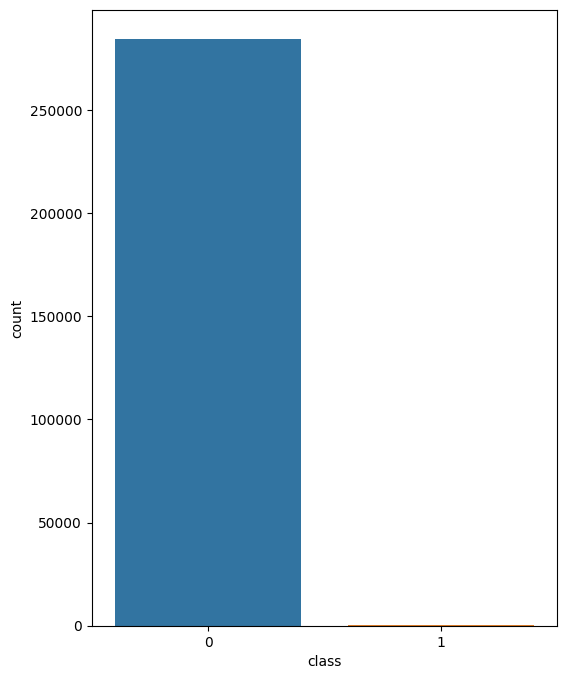

In [ ]:
# Plot
f, ax = plt.subplots(figsize=(6, 8))
_ax = sns.countplot(x="class", data=df, hue="class", legend=False)

In [ ]:
# Describes time and amount values
print(df[["time", "amount"]].describe())
# On average, each transaction happens every time:mean seconds
# This two columns have outliers. It can be seen from the difference w max value

shape: (9, 3)
┌────────────┬──────────────┬────────────┐
│ statistic  ┆ time         ┆ amount     │
│ ---        ┆ ---          ┆ ---        │
│ str        ┆ f64          ┆ f64        │
╞════════════╪══════════════╪════════════╡
│ count      ┆ 284807.0     ┆ 284807.0   │
│ null_count ┆ 0.0          ┆ 0.0        │
│ mean       ┆ 94813.859575 ┆ 88.349619  │
│ std        ┆ 47488.145955 ┆ 250.120109 │
│ min        ┆ 0.0          ┆ 0.0        │
│ 25%        ┆ 54202.0      ┆ 5.6        │
│ 50%        ┆ 84692.0      ┆ 22.0       │
│ 75%        ┆ 139321.0     ┆ 77.17      │
│ max        ┆ 172792.0     ┆ 25691.16   │
└────────────┴──────────────┴────────────┘


In [ ]:
# Get data about fraud transaction vs normal transactions (count, columns)
fraud = df.filter(pd.col("class") == "1")
normal = df.filter(pd.col("class") == "0")
print(f"Shape of Fraud Transactions: {fraud.shape}")
print(f"Shape of Normal Transactions: {normal.shape}")

# Compare side by side the fraud and normal amounts

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


In [ ]:
n = normal["amount"].describe()
# Combine horizontally
print(
    pd.concat(
        [
            n.select("statistic"),
            fraud["amount"]
            .describe()
            .select("value")
            .rename({"value": "fraud_amount"}),
            n.select("value").rename({"value": "normal_amount"}),
        ],
        how="horizontal",
    )
)
# Check the monetary amount involved in frauds
print(fraud["amount"].value_counts(sort=True).head())
#  With fraud transactions, the average amount of fraud is 122.22 USD,
#  the highest is 2125 USD,
#  the lowest is 0 and
#  the maximum amount is 1 USD with 113 times.


shape: (9, 3)
┌────────────┬──────────────┬───────────────┐
│ statistic  ┆ fraud_amount ┆ normal_amount │
│ ---        ┆ ---          ┆ ---           │
│ str        ┆ f64          ┆ f64           │
╞════════════╪══════════════╪═══════════════╡
│ count      ┆ 492.0        ┆ 284315.0      │
│ null_count ┆ 0.0          ┆ 0.0           │
│ mean       ┆ 122.211321   ┆ 88.291022     │
│ std        ┆ 256.683288   ┆ 250.105092    │
│ min        ┆ 0.0          ┆ 0.0           │
│ 25%        ┆ 1.0          ┆ 5.65          │
│ 50%        ┆ 9.29         ┆ 22.0          │
│ 75%        ┆ 105.89       ┆ 77.05         │
│ max        ┆ 2125.87      ┆ 25691.16      │
└────────────┴──────────────┴───────────────┘
shape: (5, 2)
┌────────┬───────┐
│ amount ┆ count │
│ ---    ┆ ---   │
│ f64    ┆ u32   │
╞════════╪═══════╡
│ 1.0    ┆ 113   │
│ 0.0    ┆ 27    │
│ 99.99  ┆ 27    │
│ 0.76   ┆ 17    │
│ 0.77   ┆ 10    │
└────────┴───────┘


<Axes: title={'center': 'Distribution of Transaction Time'}, ylabel='Count'>

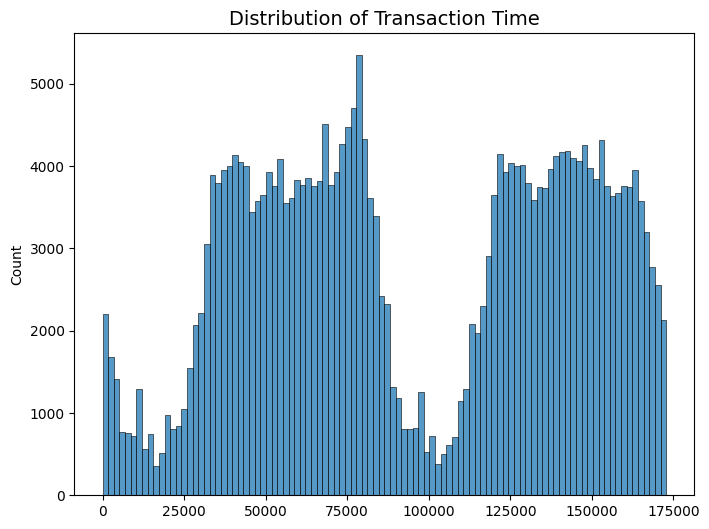

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Transaction Time", fontsize=14)
sns.histplot(df["time"], bins=100)

This data set contains two-day trading information, looking at the distribution chart we see two peaks and two troughs. Most likely, the two peaks are transactions during the day because of the high volume of transactions, and the two bottoms are transactions at night when everyone is asleep.

Text(0.5, 1.0, 'Distribution of Genuine Transactions')

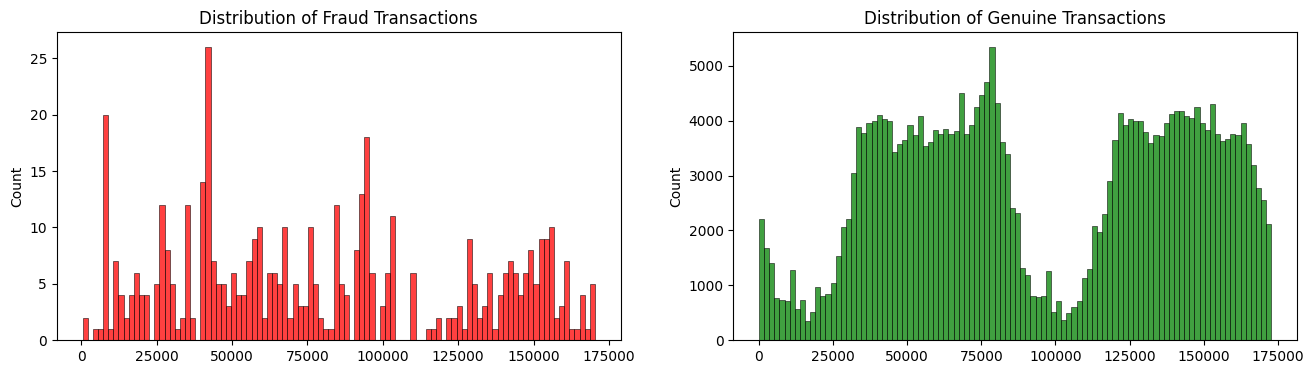

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
axs[0].set_title("Distribution of Fraud Transactions")
sns.histplot(fraud["time"], bins=100, color="red", ax=axs[0])

sns.histplot(normal["time"], bins=100, color="green", ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

Text(0.5, 1.0, 'Distribution of Normal Transactions')

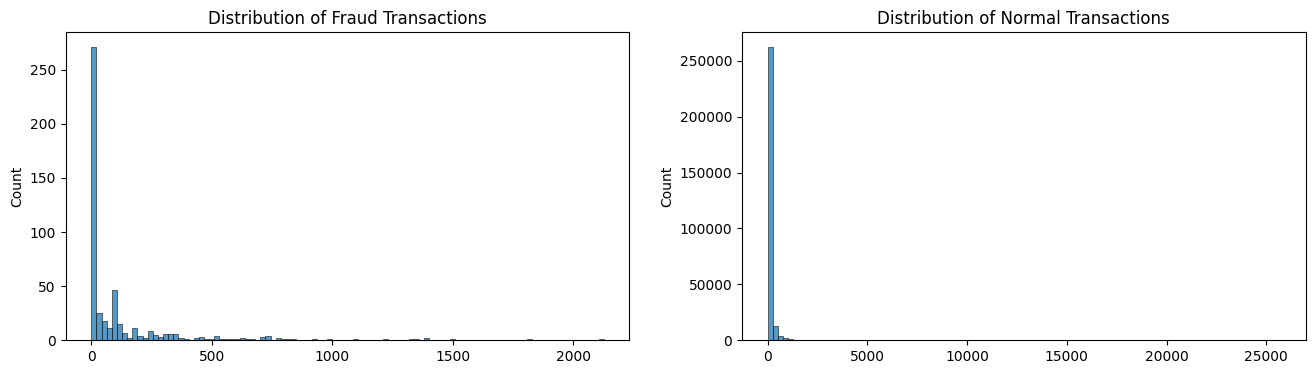

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
sns.histplot(fraud["amount"], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(normal["amount"], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

Log transforms are useful when applied to skewed distributions because they tend to expand values in the lower magnitude range and tend to compress or reduce values in the magnitude range.

In [ ]:
df.insert_column(-1, pd.Series("amount_log", np.log(df["amount"] + 0.0001)))

print(df.head())
# Convert everything to float, otherwise we get errors with string - float operations
df.replace_column(
    df.get_column_index("class"), df.get_column("class").cast(pd.Float64)
)

DuplicateError: column with name "amount_log" is already present in the DataFrame

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


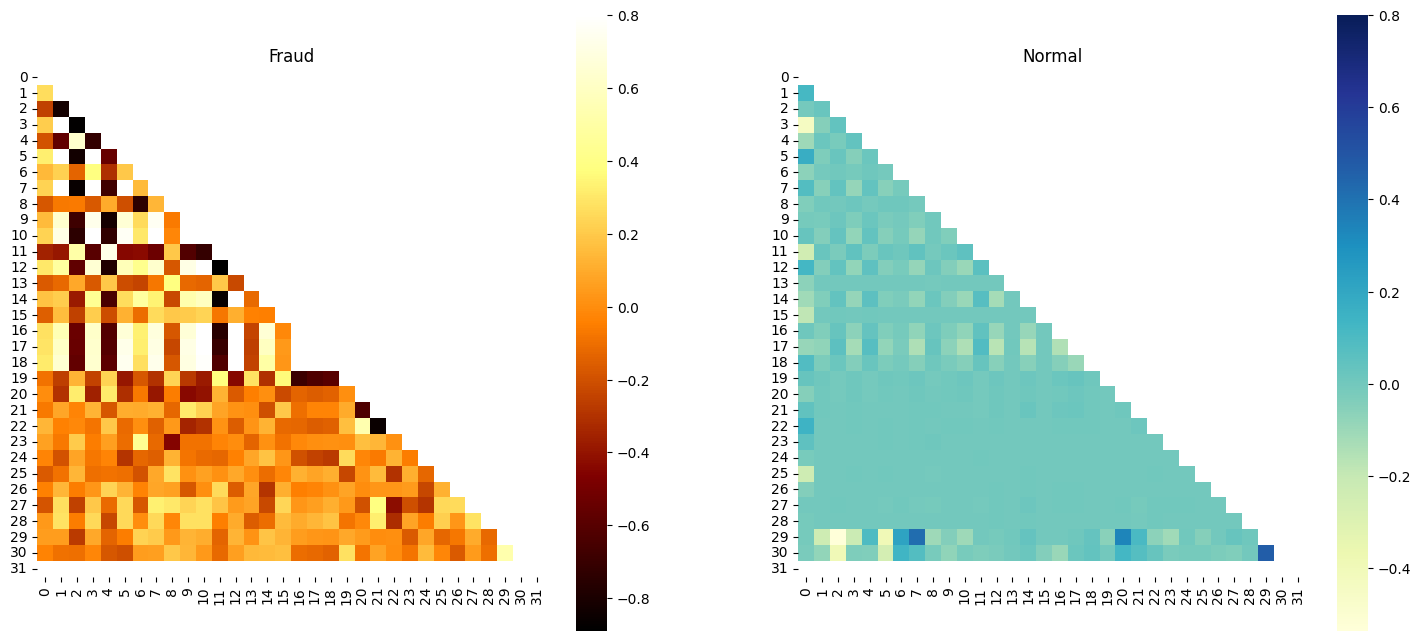

In [ ]:
# Correlation matrix
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Get data about fraud transaction vs normal transactions (count, columns)
fraud = df.filter(pd.col("class") == 1)
normal = df.filter(pd.col("class") == 0)

sns.heatmap(fraud.corr(), vmax=0.8, square=True, ax=ax1, cmap="afmhot", mask=mask)
ax1.set_title("Fraud")
sns.heatmap(normal.corr(), vmax=0.8, square=True, ax=ax2, cmap="YlGnBu", mask=mask)
ax2.set_title("Normal")

plt.show()

Let's prepare the dataset

In [ ]:
# Start by cleaning up, making everything lower case & converting data types
raw_data.columns = [col.lower() for col in raw_data.columns]
raw_data.replace_column(
    raw_data.get_column_index("class"), raw_data.get_column("class").cast(pd.String)
)
# Scale amount by log
raw_data.insert_column(-1, pd.Series("amount_log", np.log(raw_data["amount"] + 0.0001)))
# Convert everything to float, otherwise we get errors with string - float operations
raw_data.replace_column(
    raw_data.get_column_index("class"),raw_data.get_column("class").cast(pd.Float64)
)

shape: (284_807, 32)
┌──────────┬────────────┬───────────┬───────────┬───┬───────────┬────────┬────────────┬───────┐
│ time     ┆ v1         ┆ v2        ┆ v3        ┆ … ┆ v28       ┆ amount ┆ amount_log ┆ class │
│ ---      ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---    ┆ ---        ┆ ---   │
│ f64      ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64    ┆ f64        ┆ f64   │
╞══════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪════════╪════════════╪═══════╡
│ 0.0      ┆ -1.359807  ┆ -0.072781 ┆ 2.536347  ┆ … ┆ -0.021053 ┆ 149.62 ┆ 5.008099   ┆ 0.0   │
│ 0.0      ┆ 1.191857   ┆ 0.266151  ┆ 0.16648   ┆ … ┆ 0.014724  ┆ 2.69   ┆ 0.989578   ┆ 0.0   │
│ 1.0      ┆ -1.358354  ┆ -1.340163 ┆ 1.773209  ┆ … ┆ -0.059752 ┆ 378.66 ┆ 5.936639   ┆ 0.0   │
│ 1.0      ┆ -0.966272  ┆ -0.185226 ┆ 1.792993  ┆ … ┆ 0.061458  ┆ 123.5  ┆ 4.816242   ┆ 0.0   │
│ 2.0      ┆ -1.158233  ┆ 0.877737  ┆ 1.548718  ┆ … ┆ 0.215153  ┆ 69.99  ┆ 4.248354   ┆ 0.0   │
│ …        ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …      ┆ …          ┆ …     │
│ 172786.0 ┆ -11.881118 ┆ 10.071785 ┆ -9.834783 ┆ … ┆ 0.823731  ┆ 0.77   ┆ -0.261235  ┆ 0.0   │
│ 172787.0 ┆ -0.732789  ┆ -0.05508  ┆ 2.03503   ┆ … ┆ -0.053527 ┆ 24.79  ┆ 3.210444   ┆ 0.0   │
│ 172788.0 ┆ 1.919565   ┆ -0.301254 ┆ -3.24964  ┆ … ┆ -0.026561 ┆ 67.88  ┆ 4.217743   ┆ 0.0   │
│ 172788.0 ┆ -0.24044   ┆ 0.530483  ┆ 0.70251   ┆ … ┆ 0.104533  ┆ 10.0   ┆ 2.302595   ┆ 0.0   │
│ 172792.0 ┆ -0.533413  ┆ -0.189733 ┆ 0.703337  ┆ … ┆ 0.013649  ┆ 217.0  ┆ 5.379898   ┆ 0.0   │
└──────────┴────────────┴───────────┴───────────┴───┴───────────┴────────┴────────────┴───────┘

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
x = raw_data.drop(["class", "time"])
y = raw_data["class"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

print(x_train.shape)
print(x_test.shape)

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

print("Original dataset shape %s" % Counter(y_train))

smt = SMOTE(random_state=42)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

print("Resampled dataset shape %s" % Counter(y_train_smt))

(227845, 30)
(56962, 30)
Original dataset shape Counter({0.0: 227454, 1.0: 391})
Resampled dataset shape Counter({0.0: 227454, 1.0: 227454})


In [ ]:
import time

from matplotlib import pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    cohen_kappa_score,
    f1_score,
    classification_report,
    roc_curve,
    ConfusionMatrixDisplay,
)

In [ ]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

In [ ]:
def run_model(model, x_train, y_train, x_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(x_train, y_train, verbose=0)
    else:
        model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    # Accuracy is useful with balanced datasets, but kinda useless with imbalanced data.
    # If I'm operating in a sector in which 90% of data is class 1, then a model that only says
    # class 1 has 90% accuracy
    print("Accuracy = {}".format(accuracy))
    # Performance metric for binary classification (YES/NO)
    # Works well with unbalanced data
    print("ROC Area under Curve = {}".format(roc_auc))
    # When a model predicts 'X', how often is it correct? Minimizes false alarms
    if verbose:
        print("Precision  = {}".format(precision))
        # Minimizes missed positives
        print("Recall  = {}".format(recall))
        # The F1 score is a single metric that balances precision and recall. It answers:
        # "Can the model achieve high precision and high recall at the same time?"
        print("F1 Score  = {}".format(f1))
    # Cohen's Kappa measures how much better your model is compared to random chance
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(x_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Updated confusion matrix plotting
    ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=model.classes_,  # Optional: show class labels
    )
    plt.title("Confusion Matrix")
    plt.show()

    return model, accuracy, roc_auc, f1, coh_kap, time_taken

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [ ]:
# Logistic Regression with SMOTE
def logistic_regression(x_train_smt, y_train_smt, x_test, y_test):
    params_lr = {"penalty": "l1", "solver": "liblinear"}  # "class_weight": "balanced"}

    model_lrsmt = LogisticRegression(**params_lr)
    (
        model_lrsmt,
        accuracy_lrsmt,
        roc_auc_lrsmt,
        f1_score_lrsmt,
        coh_kap_lrsmt,
        tt_lrsmt,
    ) = run_model(model_lrsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt, tt_lrsmt

In [ ]:
# Decision Tree
def decision_tree(x_train_smt, y_train_smt, x_test, y_test):
    params_dt = {"max_depth": 16, "max_features": "sqrt"}

    model_dtsmt = DecisionTreeClassifier(**params_dt)
    (
        model_dtsmt,
        accuracy_dtsmt,
        roc_auc_dtsmt,
        f1_score_dtsmt,
        coh_kap_dtsmt,
        tt_dtsmt,
    ) = run_model(model_dtsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt, tt_dtsmt

In [ ]:
def random_forest(x_train_smt, y_train_smt, x_test, y_test):
    # Random Forest with SMOTE
    model_rfsmt = RandomForestClassifier()
    (
        model_rfsmt,
        accuracy_rfsmt,
        roc_auc_rfsmt,
        f1_score_rfsmt,
        coh_kap_rfsmt,
        tt_rfsmt,
    ) = run_model(model_rfsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt, tt_rfsmt

In [ ]:
def lightGBM(x_train_smt, y_train_smt, x_test, y_test):
    # Light GBM with SMOTE

    model_lgbsmt = lgb.LGBMClassifier()
    (
        model_lgbsmt,
        accuracy_lgbsmt,
        roc_auc_lgbsmt,
        f1_score_lgbsmt,
        coh_kap_lgbsmt,
        tt_lgbsmt,
    ) = run_model(model_lgbsmt, x_train_smt, y_train_smt, x_test, y_test)
    return accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt, tt_lgbsmt

Accuracy = 0.9758084336926371
ROC Area under Curve = 0.9582325215163398
Precision  = 0.06475800954328562
Recall  = 0.9405940594059405
F1 Score  = 0.1211734693877551
Cohen's Kappa = 0.11824799262710184
Time taken = 39.69190692901611
              precision    recall  f1-score   support

         0.0    0.99989   0.97587   0.98774     56861
         1.0    0.06476   0.94059   0.12117       101

    accuracy                        0.97581     56962
   macro avg    0.53232   0.95823   0.55445     56962
weighted avg    0.99823   0.97581   0.98620     56962



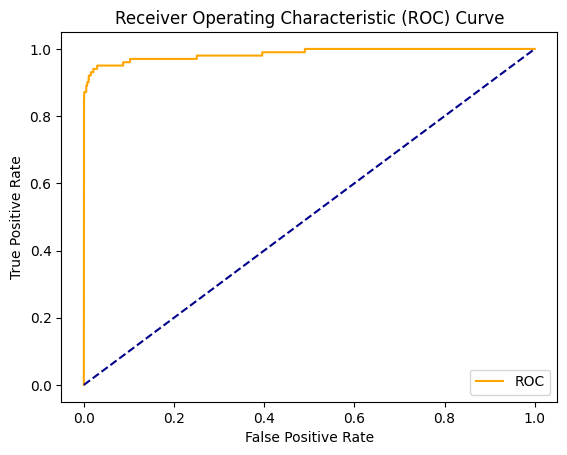

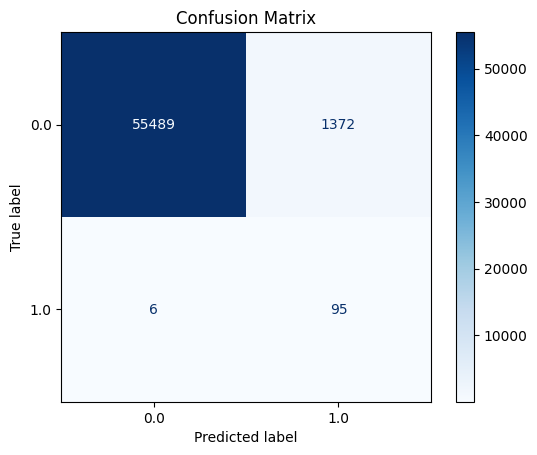

In [ ]:
accuracy_lrsmt, roc_auc_lrsmt, f1_score_lrsmt, coh_kap_lrsmt, tt_lrsmt = (
    logistic_regression(x_train_smt, y_train_smt, x_test, y_test)
)

Accuracy = 0.9873073276921457
ROC Area under Curve = 0.8849249542178678
Precision  = 0.10128205128205128
Recall  = 0.7821782178217822
F1 Score  = 0.1793416572077185
Cohen's Kappa = 0.17675694072609738
Time taken = 17.82244610786438
              precision    recall  f1-score   support

         0.0    0.99961   0.98767   0.99360     56861
         1.0    0.10128   0.78218   0.17934       101

    accuracy                        0.98731     56962
   macro avg    0.55045   0.88492   0.58647     56962
weighted avg    0.99802   0.98731   0.99216     56962



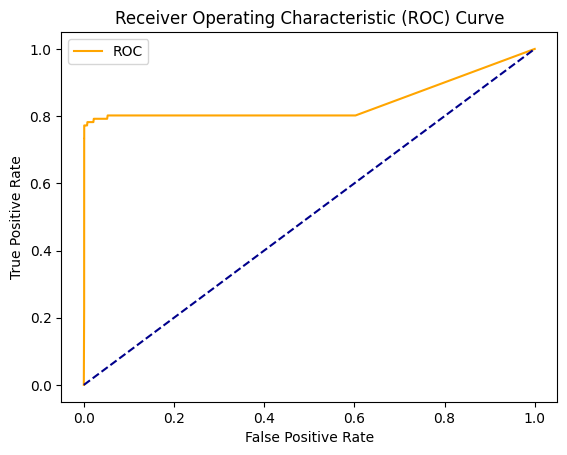

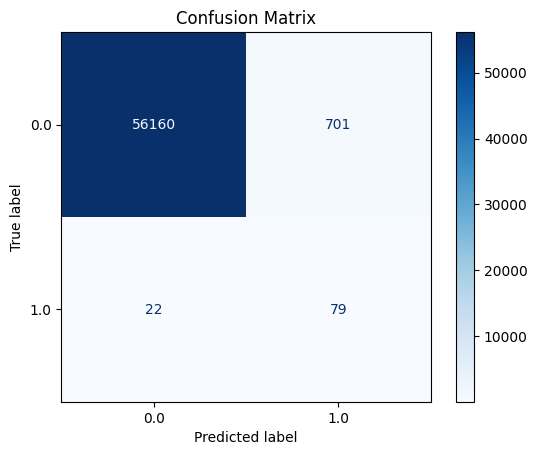

In [ ]:
accuracy_dtsmt, roc_auc_dtsmt, f1_score_dtsmt, coh_kap_dtsmt, tt_dtsmt = (
    decision_tree(x_train_smt, y_train_smt, x_test, y_test)
)

Accuracy = 0.9995259997893332
ROC Area under Curve = 0.9206953521014681
Precision  = 0.8854166666666666
Recall  = 0.8415841584158416
F1 Score  = 0.8629441624365483
Cohen's Kappa = 0.8627069049953214
Time taken = 687.8100643157959
              precision    recall  f1-score   support

         0.0    0.99972   0.99981   0.99976     56861
         1.0    0.88542   0.84158   0.86294       101

    accuracy                        0.99953     56962
   macro avg    0.94257   0.92070   0.93135     56962
weighted avg    0.99952   0.99953   0.99952     56962



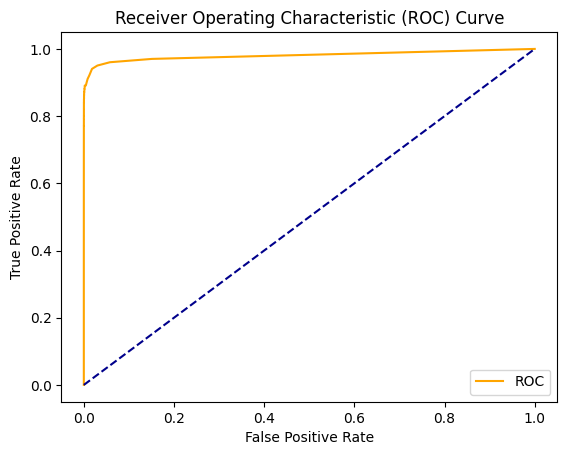

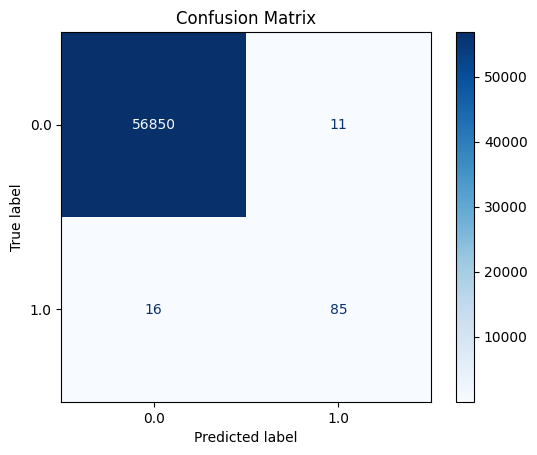

In [ ]:
accuracy_rfsmt, roc_auc_rfsmt, f1_score_rfsmt, coh_kap_rfsmt, tt_rfsmt = (
    random_forest(x_train_smt, y_train_smt, x_test, y_test)
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227454, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy = 0.9987886661282961
ROC Area under Curve = 0.9252677320984767
Precision  = 0.6142857142857143
Recall  = 0.8514851485148515
F1 Score  = 0.7136929460580913
Cohen's Kappa = 0.7131019225286181
Time taken = 15.590112686157227
              precision    recall  f1-score   support

         0.0    0.99974   0.99905   0.99939     56861
         1.0    0.61429   0.85149   0.71369       101

    accuracy                        0.99879     56962
   macro avg    0.80701   0.92527   0.85654     56962
weighted avg    0.99905   0.99879   0.99889     56962



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


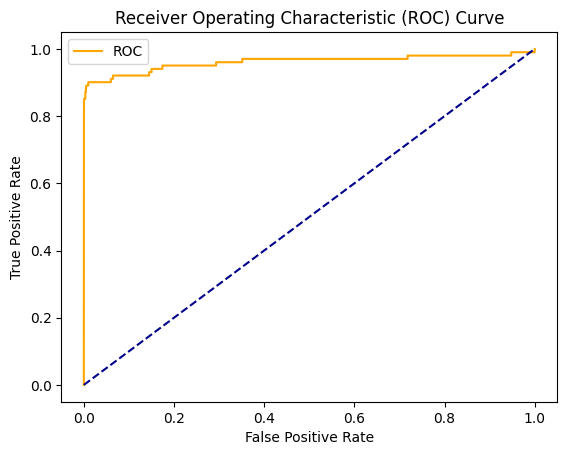

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


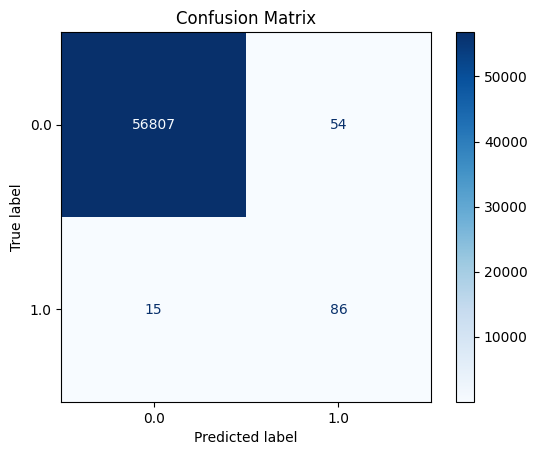

In [ ]:
accuracy_lgbsmt, roc_auc_lgbsmt, f1_score_lgbsmt, coh_kap_lgbsmt, tt_lgbsmt = (
    lightGBM(x_train_smt, y_train_smt, x_test, y_test)
)

In [ ]:
accuracy_scores = [accuracy_lrsmt, accuracy_dtsmt, accuracy_rfsmt, accuracy_lgbsmt]
roc_auc_scores = [roc_auc_lrsmt, roc_auc_dtsmt, roc_auc_rfsmt, roc_auc_lgbsmt]
f1_scores = [f1_score_lrsmt, f1_score_dtsmt, f1_score_rfsmt, f1_score_lgbsmt]
coh_kap_scores = [coh_kap_lrsmt, coh_kap_dtsmt, coh_kap_rfsmt, coh_kap_lgbsmt]
tt = [tt_lrsmt, tt_dtsmt, tt_rfsmt, tt_lgbsmt]

In [ ]:
def visualize_model_accuracy_and_time(model_data):
    data = pd.DataFrame(model_data)

    fig, ax1 = plt.subplots(figsize=(12, 10))
    ax1.set_title(
        "Model Comparison: Accuracy and Time taken for execution", fontsize=13
    )
    color = "tab:green"
    ax1.set_xlabel("Model", fontsize=13)
    ax1.set_ylabel("Time taken", fontsize=13, color=color)
    ax2 = sns.barplot(
        x="Model",
        y="Time taken",
        data=data,
        palette="summer",
        hue="Model",
        legend=False,
    )
    ax1.tick_params(axis="y")
    ax2 = ax1.twinx()
    color = "tab:red"
    ax2.set_ylabel("F1 Score", fontsize=13, color=color)
    ax2 = sns.lineplot(x="Model", y="F1 Score", data=data, sort=False, color=color)
    ax2.tick_params(axis="y", color=color)
    plt.show()


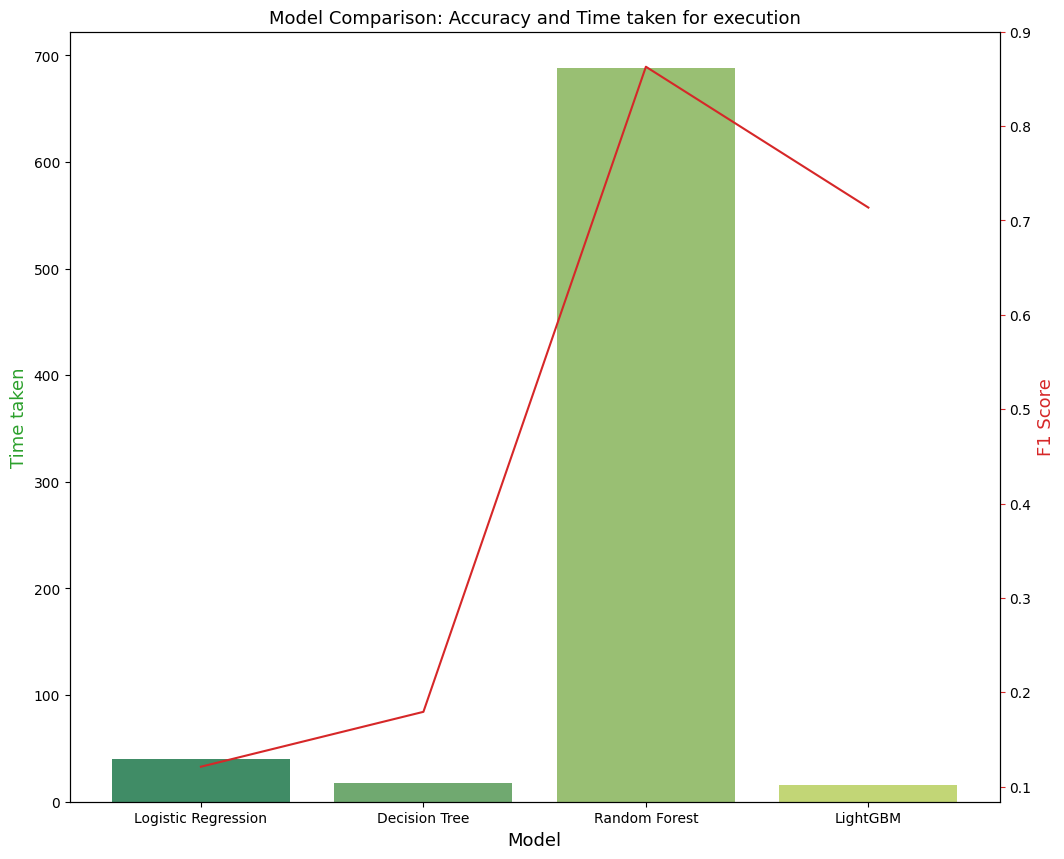

In [ ]:
model_data = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "LightGBM",
        # "Catboost",
        # "XGBoost",
        # "AdaBoost",
        # "TabNet",
    ],
    "Accuracy": accuracy_scores,
    "ROC_AUC": roc_auc_scores,
    "F1 Score": f1_scores,
    "Cohen_Kappa": coh_kap_scores,
    "Time taken": tt,
}
visualize_model_accuracy_and_time(model_data)

Let's train

In [ ]:
from sklearn.metrics import (
    make_scorer,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
def objective(trial, x_train_smt, y_train_smt):
    max_depth = trial.suggest_int("max_depth", 2, 14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        # "n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }
    # scoring = {'accuracy' : make_scorer(accuracy_score),
    #      'precision' : make_scorer(precision_score),
    #     'recall' : make_scorer(recall_score),
    #    'f1_score' : make_scorer(f1_score)}

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**param_grid)
    model.fit(x_train_smt, y_train_smt)
    scores = cross_val_score(
        model,
        x_train_smt,
        y_train_smt,
        scoring=make_scorer(f1_score, average="weighted", labels=[1]),
        cv=cv,
        n_jobs=-1,
    )
    return np.mean(scores)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.0 MB/s eta 0:00:00


In [ ]:
import optuna

[I 2025-04-12 19:57:37,548] A new study created in memory with name: no-name-ea3e38b3-f01a-4f98-95b7-d4750d803da0
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_gain_to_split is set=1.2934928524726192, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2934928524726192
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 19:59:02,496] Trial 0 finished with value: 0.9979737656494321 and parameters: {'max_depth': 9, 'learning_rate': 0.14620984384248206, 'num_leaves': 43, 'min_data_in_leaf': 194, 'max_bin': 94, 'lambda_l1': 55, 'lambda_l2': 25, 'min_gain_to_split': 1.2934928524726192, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.9979737656494321.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] min_gain_to_split is set=2.770714925950813, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.770714925950813
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] feature_fraction is set=0.8, co

[I 2025-04-12 19:59:35,539] Trial 1 finished with value: 0.9829533338226822 and parameters: {'max_depth': 3, 'learning_rate': 0.2936603206867922, 'num_leaves': 5, 'min_data_in_leaf': 92, 'max_bin': 199, 'lambda_l1': 80, 'lambda_l2': 90, 'min_gain_to_split': 2.770714925950813, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.9979737656494321.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] min_gain_to_split is set=7.797080578417524, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.797080578417524
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.9, co

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2025-04-12 20:00:59,984] Trial 2 finished with value: 0.9960815501489334 and parameters: {'max_depth': 13, 'learning_rate': 0.04742590014829579, 'num_leaves': 6152, 'min_data_in_leaf': 32, 'max_bin': 250, 'lambda_l1': 80, 'lambda_l2': 40, 'min_gain_to_split': 7.797080578417524, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.9979737656494321.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renam

[LightGBM] [Warning] min_data_in_leaf is set=113, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=113
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] min_gain_to_split is set=5.539626428716492, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.539626428716492
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=113, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=113
[LightGBM] [Warnin

[I 2025-04-12 20:01:35,613] Trial 3 finished with value: 0.9971202693485056 and parameters: {'max_depth': 7, 'learning_rate': 0.2913666846930598, 'num_leaves': 35, 'min_data_in_leaf': 113, 'max_bin': 41, 'lambda_l1': 40, 'lambda_l2': 85, 'min_gain_to_split': 5.539626428716492, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 0 with value: 0.9979737656494321.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] min_gain_to_split is set=2.9681934669185734, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9681934669185734
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2025-04-12 20:02:23,749] Trial 4 finished with value: 0.9989261136465858 and parameters: {'max_depth': 6, 'learning_rate': 0.2310748857696319, 'num_leaves': 40, 'min_data_in_leaf': 32, 'max_bin': 92, 'lambda_l1': 25, 'lambda_l2': 55, 'min_gain_to_split': 2.9681934669185734, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 4 with value: 0.9989261136465858.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=492, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=492
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.6550056129590915, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6550056129590915
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=492, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=492
[LightGBM] [Warn

[I 2025-04-12 20:03:13,602] Trial 5 finished with value: 0.9894403718317145 and parameters: {'max_depth': 14, 'learning_rate': 0.029541964907555646, 'num_leaves': 1936, 'min_data_in_leaf': 492, 'max_bin': 236, 'lambda_l1': 15, 'lambda_l2': 5, 'min_gain_to_split': 2.6550056129590915, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 4 with value: 0.9989261136465858.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=469, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=469
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] min_gain_to_split is set=11.576893017359973, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.576893017359973
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=469, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=469
[LightGBM] [Warning] feature_fraction is set

[I 2025-04-12 20:03:48,391] Trial 6 finished with value: 0.9690050580219035 and parameters: {'max_depth': 7, 'learning_rate': 0.15712828856229683, 'num_leaves': 4, 'min_data_in_leaf': 469, 'max_bin': 192, 'lambda_l1': 55, 'lambda_l2': 100, 'min_gain_to_split': 11.576893017359973, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 4 with value: 0.9989261136465858.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=467, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=467
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=4.3189149160880165, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.3189149160880165
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=467, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=467
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 20:04:34,328] Trial 7 finished with value: 0.9993936588187534 and parameters: {'max_depth': 13, 'learning_rate': 0.21064633410535602, 'num_leaves': 7267, 'min_data_in_leaf': 467, 'max_bin': 190, 'lambda_l1': 0, 'lambda_l2': 20, 'min_gain_to_split': 4.3189149160880165, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 7 with value: 0.9993936588187534.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=492, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=492
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=7.602996737834714, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.602996737834714
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=492, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=492
[LightGBM] [Warn

[I 2025-04-12 20:05:12,268] Trial 8 finished with value: 0.9820177230661757 and parameters: {'max_depth': 7, 'learning_rate': 0.16616672456174617, 'num_leaves': 5, 'min_data_in_leaf': 492, 'max_bin': 98, 'lambda_l1': 100, 'lambda_l2': 20, 'min_gain_to_split': 7.602996737834714, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 7 with value: 0.9993936588187534.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=347, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=347
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=8.503791472144066, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.503791472144066
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=347, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=347
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 20:05:43,100] Trial 9 finished with value: 0.9839645470812719 and parameters: {'max_depth': 8, 'learning_rate': 0.156267216905225, 'num_leaves': 23, 'min_data_in_leaf': 347, 'max_bin': 18, 'lambda_l1': 60, 'lambda_l2': 10, 'min_gain_to_split': 8.503791472144066, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 7 with value: 0.9993936588187534.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=350, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=350
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] min_gain_to_split is set=14.753921951001601, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.753921951001601
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=350, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=350
[LightGBM] [Warnin

[I 2025-04-12 20:06:36,767] Trial 10 finished with value: 0.9985022867213587 and parameters: {'max_depth': 11, 'learning_rate': 0.08734767513047148, 'num_leaves': 2017, 'min_data_in_leaf': 350, 'max_bin': 285, 'lambda_l1': 0, 'lambda_l2': 55, 'min_gain_to_split': 14.753921951001601, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 7 with value: 0.9993936588187534.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=267, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=267
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] min_gain_to_split is set=5.071172525627662, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.071172525627662
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=267, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=267
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2025-04-12 20:07:24,241] Trial 11 finished with value: 0.9984546301265438 and parameters: {'max_depth': 4, 'learning_rate': 0.23314746363377314, 'num_leaves': 15, 'min_data_in_leaf': 267, 'max_bin': 126, 'lambda_l1': 25, 'lambda_l2': 60, 'min_gain_to_split': 5.071172525627662, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 7 with value: 0.9993936588187534.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=362, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=362
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_gain_to_split is set=0.29837730225535086, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.29837730225535086
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=362, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=362
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 20:08:14,110] Trial 12 finished with value: 0.9995034498713666 and parameters: {'max_depth': 5, 'learning_rate': 0.22456592000123576, 'num_leaves': 29, 'min_data_in_leaf': 362, 'max_bin': 154, 'lambda_l1': 0, 'lambda_l2': 35, 'min_gain_to_split': 0.29837730225535086, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 12 with value: 0.9995034498713666.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=393, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=393
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_gain_to_split is set=1.1059802875303266, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1059802875303266
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=393, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=393
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 20:09:03,855] Trial 13 finished with value: 0.9995539613977129 and parameters: {'max_depth': 11, 'learning_rate': 0.22373613787533392, 'num_leaves': 665, 'min_data_in_leaf': 393, 'max_bin': 163, 'lambda_l1': 0, 'lambda_l2': 35, 'min_gain_to_split': 1.1059802875303266, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=381, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=381
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_gain_to_split is set=0.40216130298020225, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.40216130298020225
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=381, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=381
[LightGBM] [Warning] feature_fraction is set

[I 2025-04-12 20:09:50,641] Trial 14 finished with value: 0.9993058389268924 and parameters: {'max_depth': 10, 'learning_rate': 0.2045185774469191, 'num_leaves': 450, 'min_data_in_leaf': 381, 'max_bin': 158, 'lambda_l1': 15, 'lambda_l2': 35, 'min_gain_to_split': 0.40216130298020225, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] min_gain_to_split is set=0.6780632637774433, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6780632637774433
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 20:10:31,904] Trial 15 finished with value: 0.9987966773082049 and parameters: {'max_depth': 5, 'learning_rate': 0.2686611553014229, 'num_leaves': 31, 'min_data_in_leaf': 277, 'max_bin': 141, 'lambda_l1': 35, 'lambda_l2': 40, 'min_gain_to_split': 0.6780632637774433, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=405, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=405
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] min_gain_to_split is set=11.008330515634562, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.008330515634562
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=405, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=405
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 20:11:02,590] Trial 16 finished with value: 0.9629592862686318 and parameters: {'max_depth': 2, 'learning_rate': 0.11949509683691634, 'num_leaves': 4, 'min_data_in_leaf': 405, 'max_bin': 166, 'lambda_l1': 10, 'lambda_l2': 75, 'min_gain_to_split': 11.008330515634562, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=310, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=310
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] min_gain_to_split is set=1.497172868590181, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.497172868590181
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=310, min_child_samples=20 will be ignored. Current value: min_data_in

[I 2025-04-12 20:11:52,406] Trial 17 finished with value: 0.999422198847957 and parameters: {'max_depth': 11, 'learning_rate': 0.2539947832735388, 'num_leaves': 656, 'min_data_in_leaf': 310, 'max_bin': 227, 'lambda_l1': 0, 'lambda_l2': 70, 'min_gain_to_split': 1.497172868590181, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=204, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=204
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_gain_to_split is set=0.10444974644312438, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.10444974644312438
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=204, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=204
[LightGBM] [

[I 2025-04-12 20:12:30,049] Trial 18 finished with value: 0.9979132594940685 and parameters: {'max_depth': 5, 'learning_rate': 0.1956369558709713, 'num_leaves': 13, 'min_data_in_leaf': 204, 'max_bin': 63, 'lambda_l1': 30, 'lambda_l2': 30, 'min_gain_to_split': 0.10444974644312438, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=426, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=426
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=5.987197309747596, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.987197309747596
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=426, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=426
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 20:13:11,964] Trial 19 finished with value: 0.998829495385064 and parameters: {'max_depth': 9, 'learning_rate': 0.18639651957206924, 'num_leaves': 131, 'min_data_in_leaf': 426, 'max_bin': 116, 'lambda_l1': 10, 'lambda_l2': 45, 'min_gain_to_split': 5.987197309747596, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=211, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=211
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=3.8941708892240596, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.8941708892240596
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=211, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=211
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2025-04-12 20:13:52,549] Trial 20 finished with value: 0.9981556044734721 and parameters: {'max_depth': 12, 'learning_rate': 0.2529807228279693, 'num_leaves': 1157, 'min_data_in_leaf': 211, 'max_bin': 168, 'lambda_l1': 70, 'lambda_l2': 0, 'min_gain_to_split': 3.8941708892240596, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=315, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=315
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] min_gain_to_split is set=1.8792114758169838, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.8792114758169838
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=315, min_child_samples=20 will be ignored. Current value: min_data_

[I 2025-04-12 20:14:39,369] Trial 21 finished with value: 0.9994024413408592 and parameters: {'max_depth': 11, 'learning_rate': 0.2582682856182606, 'num_leaves': 707, 'min_data_in_leaf': 315, 'max_bin': 230, 'lambda_l1': 0, 'lambda_l2': 65, 'min_gain_to_split': 1.8792114758169838, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=308, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=308
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] min_gain_to_split is set=2.3361917662454044, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.3361917662454044
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=308, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=308
[LightGBM] [Warn

[I 2025-04-12 20:15:31,394] Trial 22 finished with value: 0.9991214522453864 and parameters: {'max_depth': 10, 'learning_rate': 0.23042583267921324, 'num_leaves': 579, 'min_data_in_leaf': 308, 'max_bin': 211, 'lambda_l1': 10, 'lambda_l2': 70, 'min_gain_to_split': 2.3361917662454044, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=414, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=414
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] min_gain_to_split is set=1.2084773747479005, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2084773747479005
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=414, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=414
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 20:16:17,536] Trial 23 finished with value: 0.9986869168039412 and parameters: {'max_depth': 12, 'learning_rate': 0.2756977796355093, 'num_leaves': 1235, 'min_data_in_leaf': 414, 'max_bin': 272, 'lambda_l1': 20, 'lambda_l2': 50, 'min_gain_to_split': 1.2084773747479005, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=358, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=358
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] min_gain_to_split is set=3.510515112458346, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.510515112458346
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=358, min_child_samples=20 will be ignored. Current value: min_data_

[I 2025-04-12 20:16:58,851] Trial 24 finished with value: 0.9982283649617555 and parameters: {'max_depth': 9, 'learning_rate': 0.23551769989099341, 'num_leaves': 176, 'min_data_in_leaf': 358, 'max_bin': 176, 'lambda_l1': 45, 'lambda_l2': 80, 'min_gain_to_split': 3.510515112458346, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 13 with value: 0.9995539613977129.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=323, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=323
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=0.056347312381536785, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.056347312381536785
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=323, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=323
[LightGBM] [Warning] feature_fraction is set

[I 2025-04-12 20:17:57,127] Trial 25 finished with value: 0.9995759253208947 and parameters: {'max_depth': 11, 'learning_rate': 0.11573202497854701, 'num_leaves': 864, 'min_data_in_leaf': 323, 'max_bin': 140, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 0.056347312381536785, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=442, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=442
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=0.27355102534287146, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.27355102534287146
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=442, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=442
[LightGBM] [Wa

[I 2025-04-12 20:19:17,891] Trial 26 finished with value: 0.9994353734026852 and parameters: {'max_depth': 14, 'learning_rate': 0.1017781245620149, 'num_leaves': 3621, 'min_data_in_leaf': 442, 'max_bin': 133, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 0.27355102534287146, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=378, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=378
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_gain_to_split is set=9.560647817970342, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.560647817970342
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=378, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=378
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 20:20:15,337] Trial 27 finished with value: 0.9979857415970568 and parameters: {'max_depth': 8, 'learning_rate': 0.07478999481920008, 'num_leaves': 68, 'min_data_in_leaf': 378, 'max_bin': 148, 'lambda_l1': 20, 'lambda_l2': 25, 'min_gain_to_split': 9.560647817970342, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=327, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=327
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_gain_to_split is set=6.47706749172222, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.47706749172222
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=327, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=327
[LightGBM] [Warning] feature_fraction is set=0.4, 

[I 2025-04-12 20:21:16,416] Trial 28 finished with value: 0.9990708977236371 and parameters: {'max_depth': 10, 'learning_rate': 0.1309678358464622, 'num_leaves': 357, 'min_data_in_leaf': 327, 'max_bin': 111, 'lambda_l1': 10, 'lambda_l2': 35, 'min_gain_to_split': 6.47706749172222, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=258, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=258
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_gain_to_split is set=1.805920753707228, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.805920753707228
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=258, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=258
[LightGBM] [Warn

[I 2025-04-12 20:22:39,975] Trial 29 finished with value: 0.9986122665983144 and parameters: {'max_depth': 9, 'learning_rate': 0.17461149572021784, 'num_leaves': 237, 'min_data_in_leaf': 258, 'max_bin': 84, 'lambda_l1': 30, 'lambda_l2': 25, 'min_gain_to_split': 1.805920753707228, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=159, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=159
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=4.6411869646171, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.6411869646171
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=159, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=159
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 20:23:59,158] Trial 30 finished with value: 0.9709700075387554 and parameters: {'max_depth': 12, 'learning_rate': 0.004073071554591662, 'num_leaves': 1030, 'min_data_in_leaf': 159, 'max_bin': 67, 'lambda_l1': 100, 'lambda_l2': 10, 'min_gain_to_split': 4.6411869646171, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=438, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=438
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=0.12542312701526798, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.12542312701526798
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=438, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=438
[LightGBM] [Wa

[I 2025-04-12 20:25:20,031] Trial 31 finished with value: 0.9994683091771064 and parameters: {'max_depth': 13, 'learning_rate': 0.10750899337858666, 'num_leaves': 3662, 'min_data_in_leaf': 438, 'max_bin': 140, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 0.12542312701526798, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=380, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=380
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=1.2683289157254702, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2683289157254702
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=380, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=380
[LightGBM] [Warn

[I 2025-04-12 20:26:09,853] Trial 32 finished with value: 0.999468311781766 and parameters: {'max_depth': 13, 'learning_rate': 0.12891921836748552, 'num_leaves': 3331, 'min_data_in_leaf': 380, 'max_bin': 153, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 1.2683289157254702, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=391, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=391
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_gain_to_split is set=1.383743139926128, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.383743139926128
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=391, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=391
[LightGBM] [Warning] feature_fraction is set=0.4, 

[I 2025-04-12 20:27:02,739] Trial 33 finished with value: 0.9994090330803891 and parameters: {'max_depth': 13, 'learning_rate': 0.14207861510649572, 'num_leaves': 2646, 'min_data_in_leaf': 391, 'max_bin': 186, 'lambda_l1': 5, 'lambda_l2': 30, 'min_gain_to_split': 1.383743139926128, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=287, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=287
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=3.261386193893112, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.261386193893112
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=287, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=287
[LightGBM] [Warning] feature_fraction is set=0.2, 

[I 2025-04-12 20:27:35,901] Trial 34 finished with value: 0.9657220495073681 and parameters: {'max_depth': 3, 'learning_rate': 0.06638566004757732, 'num_leaves': 7, 'min_data_in_leaf': 287, 'max_bin': 205, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 3.261386193893112, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=223, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=223
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=1.0927717120005034, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.0927717120005034
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=223, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=223
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 20:28:37,334] Trial 35 finished with value: 0.9994265918950263 and parameters: {'max_depth': 14, 'learning_rate': 0.1282629465211714, 'num_leaves': 11371, 'min_data_in_leaf': 223, 'max_bin': 154, 'lambda_l1': 0, 'lambda_l2': 45, 'min_gain_to_split': 1.0927717120005034, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=369, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=369
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_gain_to_split is set=2.461852203980712, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.461852203980712
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=369, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=369
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 20:29:19,135] Trial 36 finished with value: 0.9991367422717922 and parameters: {'max_depth': 12, 'learning_rate': 0.21738641777020387, 'num_leaves': 1552, 'min_data_in_leaf': 369, 'max_bin': 117, 'lambda_l1': 20, 'lambda_l2': 30, 'min_gain_to_split': 2.461852203980712, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=344, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=344
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=2.1613167511725484, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.1613167511725484
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=344, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=344
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 20:30:14,287] Trial 37 finished with value: 0.9980241892803289 and parameters: {'max_depth': 11, 'learning_rate': 0.14551567926807327, 'num_leaves': 818, 'min_data_in_leaf': 344, 'max_bin': 175, 'lambda_l1': 90, 'lambda_l2': 10, 'min_gain_to_split': 2.1613167511725484, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=457, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=457
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=2.971840875458533, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.971840875458533
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=457, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=457
[LightGBM] [Warnin

[I 2025-04-12 20:30:55,731] Trial 38 finished with value: 0.9991499905924721 and parameters: {'max_depth': 6, 'learning_rate': 0.18984685633909806, 'num_leaves': 28, 'min_data_in_leaf': 457, 'max_bin': 106, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 2.971840875458533, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=402, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=402
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] min_gain_to_split is set=1.0933943746314971, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.0933943746314971
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=402, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=402
[LightGBM] [Warn

[I 2025-04-12 20:31:38,116] Trial 39 finished with value: 0.9986869352697454 and parameters: {'max_depth': 13, 'learning_rate': 0.29264555937184195, 'num_leaves': 4825, 'min_data_in_leaf': 402, 'max_bin': 215, 'lambda_l1': 40, 'lambda_l2': 40, 'min_gain_to_split': 1.0933943746314971, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=230, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=230
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=13.860939267443689, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.860939267443689
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=230, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=230
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 20:32:25,454] Trial 40 finished with value: 0.9977533403732334 and parameters: {'max_depth': 8, 'learning_rate': 0.10144523484784698, 'num_leaves': 86, 'min_data_in_leaf': 230, 'max_bin': 82, 'lambda_l1': 15, 'lambda_l2': 5, 'min_gain_to_split': 13.860939267443689, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=432, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=432
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=0.058195064639042386, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.058195064639042386
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=432, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=432
[LightGBM] [

[I 2025-04-12 20:33:19,198] Trial 41 finished with value: 0.9994683100938829 and parameters: {'max_depth': 13, 'learning_rate': 0.11192567463362615, 'num_leaves': 3483, 'min_data_in_leaf': 432, 'max_bin': 138, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 0.058195064639042386, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=423, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=423
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=0.005901318537026468, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.005901318537026468
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=423, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=423
[LightGBM] [Warning] feature_fraction is set

[I 2025-04-12 20:34:08,444] Trial 42 finished with value: 0.9989626636250719 and parameters: {'max_depth': 14, 'learning_rate': 0.059962484435193725, 'num_leaves': 2844, 'min_data_in_leaf': 423, 'max_bin': 126, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 0.005901318537026468, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=496, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=496
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=0.9133724666950978, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9133724666950978
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=496, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=496
[LightGBM] [Warn

[I 2025-04-12 20:35:01,811] Trial 43 finished with value: 0.9994419619079753 and parameters: {'max_depth': 12, 'learning_rate': 0.0876070183404628, 'num_leaves': 3448, 'min_data_in_leaf': 496, 'max_bin': 151, 'lambda_l1': 0, 'lambda_l2': 20, 'min_gain_to_split': 0.9133724666950978, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_gain_to_split is set=1.7981605312943882, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7981605312943882
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] f

[I 2025-04-12 20:35:49,108] Trial 44 finished with value: 0.999474894835376 and parameters: {'max_depth': 13, 'learning_rate': 0.17402196313313034, 'num_leaves': 4412, 'min_data_in_leaf': 5, 'max_bin': 182, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 1.7981605312943882, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] min_gain_to_split is set=3.765214305877177, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.765214305877177
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.5, co

[I 2025-04-12 20:36:27,250] Trial 45 finished with value: 0.9972177919603714 and parameters: {'max_depth': 10, 'learning_rate': 0.16355148536535674, 'num_leaves': 344, 'min_data_in_leaf': 23, 'max_bin': 186, 'lambda_l1': 15, 'lambda_l2': 35, 'min_gain_to_split': 3.765214305877177, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=168, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=168
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] min_gain_to_split is set=2.81332112492347, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.81332112492347
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=168, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=168
[LightGBM] [Warning] feature_fraction is set=0.2, 

[I 2025-04-12 20:37:05,985] Trial 46 finished with value: 0.9990006300947296 and parameters: {'max_depth': 11, 'learning_rate': 0.21616280264544396, 'num_leaves': 888, 'min_data_in_leaf': 168, 'max_bin': 194, 'lambda_l1': 25, 'lambda_l2': 25, 'min_gain_to_split': 2.81332112492347, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] min_gain_to_split is set=1.7749350400510484, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7749350400510484
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.4, 

[I 2025-04-12 20:37:53,265] Trial 47 finished with value: 0.9988381607890069 and parameters: {'max_depth': 13, 'learning_rate': 0.17426995917505772, 'num_leaves': 5434, 'min_data_in_leaf': 60, 'max_bin': 169, 'lambda_l1': 55, 'lambda_l2': 45, 'min_gain_to_split': 1.7749350400510484, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] min_gain_to_split is set=0.691226341369386, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.691226341369386
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 20:38:42,321] Trial 48 finished with value: 0.9993168245302153 and parameters: {'max_depth': 7, 'learning_rate': 0.13369697414443812, 'num_leaves': 48, 'min_data_in_leaf': 129, 'max_bin': 159, 'lambda_l1': 10, 'lambda_l2': 30, 'min_gain_to_split': 0.691226341369386, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=292, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=292
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=5.0167350398426125, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.0167350398426125
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=292, min_child_samples=20 will be ignored. Current value: min

[I 2025-04-12 20:39:18,770] Trial 49 finished with value: 0.9892428966653408 and parameters: {'max_depth': 4, 'learning_rate': 0.15189014724194966, 'num_leaves': 8, 'min_data_in_leaf': 292, 'max_bin': 255, 'lambda_l1': 65, 'lambda_l2': 20, 'min_gain_to_split': 5.0167350398426125, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 25 with value: 0.9995759253208947.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=339, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=339
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.5373937515036893, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5373937515036893
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=339, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=339
[LightGBM] [Warning]

[I 2025-04-12 20:40:07,970] Trial 50 finished with value: 0.9995847074046272 and parameters: {'max_depth': 14, 'learning_rate': 0.20300981868867607, 'num_leaves': 8493, 'min_data_in_leaf': 339, 'max_bin': 180, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 2.5373937515036893, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 50 with value: 0.9995847074046272.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=326, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=326
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.256254862979374, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.256254862979374
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=326, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=326
[LightGBM] [Warning] f

[I 2025-04-12 20:40:58,686] Trial 51 finished with value: 0.9996286388705038 and parameters: {'max_depth': 14, 'learning_rate': 0.20463583591857332, 'num_leaves': 9803, 'min_data_in_leaf': 326, 'max_bin': 181, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 2.256254862979374, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=334, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=334
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.339349454470936, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.339349454470936
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=334, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=334
[LightGBM] [Warning] f

[I 2025-04-12 20:41:49,173] Trial 52 finished with value: 0.9996022792480581 and parameters: {'max_depth': 14, 'learning_rate': 0.20169765441756746, 'num_leaves': 9210, 'min_data_in_leaf': 334, 'max_bin': 178, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 2.339349454470936, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=331, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=331
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=4.34356655572067, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.34356655572067
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=331, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=331
[LightGBM] [Warning] fea

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2025-04-12 20:42:42,515] Trial 53 finished with value: 0.9994924708761852 and parameters: {'max_depth': 14, 'learning_rate': 0.22383591401619146, 'num_leaves': 9448, 'min_data_in_leaf': 331, 'max_bin': 201, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 4.34356655572067, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_fi

[LightGBM] [Warning] min_data_in_leaf is set=339, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=339
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=6.903821517320335, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.903821517320335
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=339, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=339
[LightGBM] [Warning] f

[I 2025-04-12 20:43:27,969] Trial 54 finished with value: 0.999327779110259 and parameters: {'max_depth': 14, 'learning_rate': 0.2010779235689213, 'num_leaves': 9541, 'min_data_in_leaf': 339, 'max_bin': 170, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 6.903821517320335, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=359, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=359
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.451239510007115, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.451239510007115
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=359, min_child_samples=20 will be ignored. Current value: min_data_in_l

[I 2025-04-12 20:44:14,457] Trial 55 finished with value: 0.9995693318428897 and parameters: {'max_depth': 14, 'learning_rate': 0.2405407635376212, 'num_leaves': 7531, 'min_data_in_leaf': 359, 'max_bin': 221, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 2.451239510007115, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.652860176927021, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.652860176927021
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning]

[I 2025-04-12 20:45:02,413] Trial 56 finished with value: 0.9991740964288391 and parameters: {'max_depth': 14, 'learning_rate': 0.24358595362692115, 'num_leaves': 7079, 'min_data_in_leaf': 300, 'max_bin': 244, 'lambda_l1': 10, 'lambda_l2': 5, 'min_gain_to_split': 2.652860176927021, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=5.479881003885129, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.479881003885129
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning]

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2025-04-12 20:45:56,339] Trial 57 finished with value: 0.9993321751441183 and parameters: {'max_depth': 14, 'learning_rate': 0.2740097732714198, 'num_leaves': 14121, 'min_data_in_leaf': 320, 'max_bin': 217, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 5.479881003885129, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

[LightGBM] [Warning] min_data_in_leaf is set=356, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=356
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=2.306242423977101, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.306242423977101
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=356, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=356
[LightGBM] [Warning]

[I 2025-04-12 20:46:39,634] Trial 58 finished with value: 0.997688259295141 and parameters: {'max_depth': 12, 'learning_rate': 0.21220955736834654, 'num_leaves': 4027, 'min_data_in_leaf': 356, 'max_bin': 226, 'lambda_l1': 80, 'lambda_l2': 0, 'min_gain_to_split': 2.306242423977101, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=242, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=242
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=3.208144191821903, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.208144191821903
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=242, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=242
[LightGBM] [Warning]

[I 2025-04-12 20:47:23,339] Trial 59 finished with value: 0.9989962993955736 and parameters: {'max_depth': 14, 'learning_rate': 0.2459661526029882, 'num_leaves': 9269, 'min_data_in_leaf': 242, 'max_bin': 200, 'lambda_l1': 20, 'lambda_l2': 5, 'min_gain_to_split': 3.208144191821903, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=8.42189632793967, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.42189632793967
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] f

[I 2025-04-12 20:48:08,303] Trial 60 finished with value: 0.9987525822587695 and parameters: {'max_depth': 11, 'learning_rate': 0.2031065641817833, 'num_leaves': 542, 'min_data_in_leaf': 277, 'max_bin': 258, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 8.42189632793967, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=366, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=366
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] min_gain_to_split is set=0.6535203154166433, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6535203154166433
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=366, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=366
[LightGBM] [Warn

[I 2025-04-12 20:48:59,993] Trial 61 finished with value: 0.9990227216777747 and parameters: {'max_depth': 6, 'learning_rate': 0.18783033320411446, 'num_leaves': 22, 'min_data_in_leaf': 366, 'max_bin': 165, 'lambda_l1': 0, 'lambda_l2': 100, 'min_gain_to_split': 0.6535203154166433, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=395, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=395
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=4.02310918364214, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.02310918364214
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=395, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=395
[LightGBM] [Warning] fea

[I 2025-04-12 20:49:47,412] Trial 62 finished with value: 0.9993672998252194 and parameters: {'max_depth': 5, 'learning_rate': 0.2300527169911036, 'num_leaves': 32, 'min_data_in_leaf': 395, 'max_bin': 296, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 4.02310918364214, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=344, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=344
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] min_gain_to_split is set=0.7051680436875887, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7051680436875887
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=344, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=344
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 20:50:36,844] Trial 63 finished with value: 0.9992048608242039 and parameters: {'max_depth': 13, 'learning_rate': 0.24450630690254344, 'num_leaves': 8028, 'min_data_in_leaf': 344, 'max_bin': 124, 'lambda_l1': 15, 'lambda_l2': 55, 'min_gain_to_split': 0.7051680436875887, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=2.086298766744325, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.086298766744325
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] f

[I 2025-04-12 20:51:19,221] Trial 64 finished with value: 0.9994002199634755 and parameters: {'max_depth': 7, 'learning_rate': 0.2610610251670086, 'num_leaves': 43, 'min_data_in_leaf': 320, 'max_bin': 191, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 2.086298766744325, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=371, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=371
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] min_gain_to_split is set=1.4784838452244649, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4784838452244649
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=371, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=371
[LightGBM] [Warn

[I 2025-04-12 20:51:54,440] Trial 65 finished with value: 0.9841352731484264 and parameters: {'max_depth': 2, 'learning_rate': 0.224261288497863, 'num_leaves': 4, 'min_data_in_leaf': 371, 'max_bin': 145, 'lambda_l1': 10, 'lambda_l2': 90, 'min_gain_to_split': 1.4784838452244649, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=412, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=412
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=3.34088269301036, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.34088269301036
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=412, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=412
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2025-04-12 20:52:45,824] Trial 66 finished with value: 0.9994792993189208 and parameters: {'max_depth': 13, 'learning_rate': 0.1941555258306063, 'num_leaves': 8035, 'min_data_in_leaf': 412, 'max_bin': 181, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 3.34088269301036, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=390, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=390
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] min_gain_to_split is set=10.498499868609168, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.498499868609168
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=390, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=390
[LightGBM] [Warn

[I 2025-04-12 20:53:30,910] Trial 67 finished with value: 0.9983357900146747 and parameters: {'max_depth': 14, 'learning_rate': 0.20756175356795353, 'num_leaves': 10725, 'min_data_in_leaf': 390, 'max_bin': 162, 'lambda_l1': 10, 'lambda_l2': 50, 'min_gain_to_split': 10.498499868609168, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=304, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=304
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=1.594720750852436, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.594720750852436
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=304, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=304
[LightGBM] [Warning] f

[I 2025-04-12 20:54:15,678] Trial 68 finished with value: 0.9991302367428819 and parameters: {'max_depth': 10, 'learning_rate': 0.2845242070646223, 'num_leaves': 446, 'min_data_in_leaf': 304, 'max_bin': 11, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 1.594720750852436, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=353, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=353
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] min_gain_to_split is set=0.5672231748840826, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5672231748840826
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=353, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=353
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 20:55:02,143] Trial 69 finished with value: 0.9987264983429622 and parameters: {'max_depth': 12, 'learning_rate': 0.24033691098105994, 'num_leaves': 1470, 'min_data_in_leaf': 353, 'max_bin': 135, 'lambda_l1': 25, 'lambda_l2': 20, 'min_gain_to_split': 0.5672231748840826, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=257, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=257
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=12.545781528482872, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.545781528482872
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=257, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=257
[LightGBM] [Warning]

[I 2025-04-12 20:55:43,027] Trial 70 finished with value: 0.999206993946921 and parameters: {'max_depth': 9, 'learning_rate': 0.17958209214732676, 'num_leaves': 222, 'min_data_in_leaf': 257, 'max_bin': 209, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 12.545781528482872, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=338, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=338
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=4.28350588545096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.28350588545096
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=338, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=338
[LightGBM] [Warning] f

[I 2025-04-12 20:56:32,676] Trial 71 finished with value: 0.9994002460231783 and parameters: {'max_depth': 14, 'learning_rate': 0.22177420666984177, 'num_leaves': 9038, 'min_data_in_leaf': 338, 'max_bin': 199, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 4.28350588545096, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=331, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=331
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=2.566477504315776, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.566477504315776
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=331, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=331
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2025-04-12 20:57:22,006] Trial 72 finished with value: 0.999404638922283 and parameters: {'max_depth': 14, 'learning_rate': 0.22879566173023952, 'num_leaves': 10287, 'min_data_in_leaf': 331, 'max_bin': 176, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 2.566477504315776, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=278, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=278
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=3.5580995061308722, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.5580995061308722
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=278, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=278
[LightGBM] [Warnin

[I 2025-04-12 20:58:13,291] Trial 73 finished with value: 0.999463916562954 and parameters: {'max_depth': 14, 'learning_rate': 0.2001686362668887, 'num_leaves': 11997, 'min_data_in_leaf': 278, 'max_bin': 222, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 3.5580995061308722, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=327, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=327
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=4.687712997611624, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.687712997611624
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=327, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=327
[LightGBM] [Warning] feature_fraction is set=0.5, co

[I 2025-04-12 20:58:57,073] Trial 74 finished with value: 0.9990753426739017 and parameters: {'max_depth': 13, 'learning_rate': 0.2526907956954101, 'num_leaves': 7735, 'min_data_in_leaf': 327, 'max_bin': 235, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 4.687712997611624, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=383, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=383
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=2.0936764338109355, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0936764338109355
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=383, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=383
[LightGBM] [Warn

[I 2025-04-12 20:59:43,966] Trial 75 finished with value: 0.9992443666293092 and parameters: {'max_depth': 12, 'learning_rate': 0.21167160391357132, 'num_leaves': 2213, 'min_data_in_leaf': 383, 'max_bin': 201, 'lambda_l1': 15, 'lambda_l2': 10, 'min_gain_to_split': 2.0936764338109355, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=365, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=365
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] min_gain_to_split is set=1.0794360437658486, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.0794360437658486
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=365, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=365
[LightGBM] [Warn

[I 2025-04-12 21:00:31,334] Trial 76 finished with value: 0.9993387763925294 and parameters: {'max_depth': 14, 'learning_rate': 0.23799356451313028, 'num_leaves': 6577, 'min_data_in_leaf': 365, 'max_bin': 176, 'lambda_l1': 10, 'lambda_l2': 15, 'min_gain_to_split': 1.0794360437658486, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 51 with value: 0.9996286388705038.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=313, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=313
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=0.4548789471063762, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4548789471063762
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=313, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=313
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 21:01:29,066] Trial 77 finished with value: 0.9997582526739235 and parameters: {'max_depth': 13, 'learning_rate': 0.22430252194545497, 'num_leaves': 7793, 'min_data_in_leaf': 313, 'max_bin': 194, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 0.4548789471063762, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=307, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=307
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.30242380527486046, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.30242380527486046
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=307, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=307
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 21:02:29,080] Trial 78 finished with value: 0.9996528039500607 and parameters: {'max_depth': 12, 'learning_rate': 0.18289222485189496, 'num_leaves': 1379, 'min_data_in_leaf': 307, 'max_bin': 156, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 0.30242380527486046, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=294, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=294
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.40539802381720047, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.40539802381720047
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=294, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=294
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 21:03:30,523] Trial 79 finished with value: 0.9996659802365693 and parameters: {'max_depth': 12, 'learning_rate': 0.1616538605043994, 'num_leaves': 1472, 'min_data_in_leaf': 294, 'max_bin': 193, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 0.40539802381720047, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=293, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=293
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.5455325479186088, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5455325479186088
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=293, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=293
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 21:04:25,887] Trial 80 finished with value: 0.9995781207332606 and parameters: {'max_depth': 13, 'learning_rate': 0.1668294424861488, 'num_leaves': 7503, 'min_data_in_leaf': 293, 'max_bin': 192, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.5455325479186088, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=301, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=301
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.3678273034854966, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3678273034854966
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=301, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=301
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 21:05:24,177] Trial 81 finished with value: 0.9996703753095856 and parameters: {'max_depth': 13, 'learning_rate': 0.162783162378547, 'num_leaves': 7531, 'min_data_in_leaf': 301, 'max_bin': 190, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 0.3678273034854966, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=291, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=291
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.29188455647319766, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.29188455647319766
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=291, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=291
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 21:06:19,864] Trial 82 finished with value: 0.9995759265276464 and parameters: {'max_depth': 13, 'learning_rate': 0.16225986875617884, 'num_leaves': 7027, 'min_data_in_leaf': 291, 'max_bin': 190, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.29188455647319766, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=265, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=265
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.3137275334347446, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3137275334347446
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=265, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=265
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2025-04-12 21:07:16,312] Trial 83 finished with value: 0.9994727054076942 and parameters: {'max_depth': 13, 'learning_rate': 0.15776363001743127, 'num_leaves': 6973, 'min_data_in_leaf': 265, 'max_bin': 191, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 0.3137275334347446, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.7772559739516185, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7772559739516185
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 21:08:08,096] Trial 84 finished with value: 0.9996198527321634 and parameters: {'max_depth': 12, 'learning_rate': 0.18192944826218727, 'num_leaves': 1708, 'min_data_in_leaf': 295, 'max_bin': 210, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 0.7772559739516185, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=308, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=308
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=0.9158628917748171, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9158628917748171
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=308, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=308
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 21:09:03,667] Trial 85 finished with value: 0.9996264408998892 and parameters: {'max_depth': 12, 'learning_rate': 0.18166726134244054, 'num_leaves': 1707, 'min_data_in_leaf': 308, 'max_bin': 208, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 0.9158628917748171, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=310, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=310
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=1.4031040582952996, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4031040582952996
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=310, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=310
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 21:09:55,271] Trial 86 finished with value: 0.9995759226658592 and parameters: {'max_depth': 12, 'learning_rate': 0.18218230322500062, 'num_leaves': 1844, 'min_data_in_leaf': 310, 'max_bin': 211, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 1.4031040582952996, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=248, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=248
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=0.9578931292897015, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9578931292897015
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=248, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=248
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 21:10:47,677] Trial 87 finished with value: 0.9996242463079721 and parameters: {'max_depth': 12, 'learning_rate': 0.1708670581746002, 'num_leaves': 1593, 'min_data_in_leaf': 248, 'max_bin': 182, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 0.9578931292897015, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=0.9022276857745408, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9022276857745408
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 21:11:41,769] Trial 88 finished with value: 0.9993387716142828 and parameters: {'max_depth': 12, 'learning_rate': 0.13898686101893593, 'num_leaves': 1675, 'min_data_in_leaf': 245, 'max_bin': 208, 'lambda_l1': 20, 'lambda_l2': 10, 'min_gain_to_split': 0.9022276857745408, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.8685708691981915, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8685708691981915
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2025-04-12 21:12:33,410] Trial 89 finished with value: 0.9996242457768215 and parameters: {'max_depth': 12, 'learning_rate': 0.16907773200213366, 'num_leaves': 1336, 'min_data_in_leaf': 277, 'max_bin': 184, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 0.8685708691981915, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=271, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=271
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=1.032546680611346, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.032546680611346
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=271, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=271
[LightGBM] [Warning] feature_fraction is set=0.4, co

[I 2025-04-12 21:13:26,076] Trial 90 finished with value: 0.9996374265056349 and parameters: {'max_depth': 11, 'learning_rate': 0.15082155606213124, 'num_leaves': 1348, 'min_data_in_leaf': 271, 'max_bin': 233, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 1.032546680611346, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=269, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=269
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.9348430675092232, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9348430675092232
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=269, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=269
[LightGBM] [Warning] feature_fraction is set=0.4, 

[I 2025-04-12 21:14:16,565] Trial 91 finished with value: 0.9996396247175146 and parameters: {'max_depth': 11, 'learning_rate': 0.150475531346603, 'num_leaves': 1364, 'min_data_in_leaf': 269, 'max_bin': 185, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 0.9348430675092232, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=271, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=271
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=1.4408630432341032, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4408630432341032
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=271, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=271
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 21:15:05,488] Trial 92 finished with value: 0.999441958042809 and parameters: {'max_depth': 11, 'learning_rate': 0.1510213833822293, 'num_leaves': 1352, 'min_data_in_leaf': 271, 'max_bin': 235, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 1.4408630432341032, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=231, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=231
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=1.1138205237872671, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1138205237872671
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=231, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=231
[LightGBM] [Warning] feature_fraction is set=0.4, 

[I 2025-04-12 21:15:54,599] Trial 93 finished with value: 0.9996264413341078 and parameters: {'max_depth': 11, 'learning_rate': 0.1680893519553817, 'num_leaves': 1296, 'min_data_in_leaf': 231, 'max_bin': 183, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 1.1138205237872671, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=198, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=198
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=1.8139470506749595, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.8139470506749595
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=198, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=198
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 21:16:41,712] Trial 94 finished with value: 0.9994639216320517 and parameters: {'max_depth': 11, 'learning_rate': 0.15794180108606742, 'num_leaves': 1176, 'min_data_in_leaf': 198, 'max_bin': 168, 'lambda_l1': 10, 'lambda_l2': 10, 'min_gain_to_split': 1.8139470506749595, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=221, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=221
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] min_gain_to_split is set=1.2000406581208862, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2000406581208862
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=221, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=221
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 21:17:32,301] Trial 95 finished with value: 0.9995034540212865 and parameters: {'max_depth': 10, 'learning_rate': 0.14479780233787354, 'num_leaves': 706, 'min_data_in_leaf': 221, 'max_bin': 244, 'lambda_l1': 10, 'lambda_l2': 5, 'min_gain_to_split': 1.2000406581208862, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=246, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=246
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=0.3355316501932457, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3355316501932457
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=246, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=246
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 21:18:25,259] Trial 96 finished with value: 0.999676965504926 and parameters: {'max_depth': 11, 'learning_rate': 0.17155039124337287, 'num_leaves': 1472, 'min_data_in_leaf': 246, 'max_bin': 198, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 0.3355316501932457, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=234, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=234
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_gain_to_split is set=0.20360319782160552, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.20360319782160552
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=234, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=234
[LightGBM] [Warning] feature_fraction is set

[I 2025-04-12 21:19:14,795] Trial 97 finished with value: 0.9995232173686462 and parameters: {'max_depth': 11, 'learning_rate': 0.19284907539653956, 'num_leaves': 1384, 'min_data_in_leaf': 234, 'max_bin': 198, 'lambda_l1': 15, 'lambda_l2': 10, 'min_gain_to_split': 0.20360319782160552, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=181, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=181
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.41391947337873164, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.41391947337873164
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=181, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=181
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2025-04-12 21:20:10,435] Trial 98 finished with value: 0.9997033288446152 and parameters: {'max_depth': 10, 'learning_rate': 0.15159806465753434, 'num_leaves': 815, 'min_data_in_leaf': 181, 'max_bin': 220, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 0.41391947337873164, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=164, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=164
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=0.13151737495731397, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.13151737495731397
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=164, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=164
[LightGBM] [Warning] feature_fraction is set=0

[I 2025-04-12 21:21:08,562] Trial 99 finished with value: 0.999426592376065 and parameters: {'max_depth': 10, 'learning_rate': 0.12047651527533024, 'num_leaves': 820, 'min_data_in_leaf': 164, 'max_bin': 228, 'lambda_l1': 20, 'lambda_l2': 0, 'min_gain_to_split': 0.13151737495731397, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 77 with value: 0.9997582526739235.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


	Best value (Accuracy): 0.99976
	Best params:
		max_depth: 13
		learning_rate: 0.22430252194545497
		num_leaves: 7793
		min_data_in_leaf: 313
		max_bin: 194
		lambda_l1: 0
		lambda_l2: 5
		min_gain_to_split: 0.4548789471063762
		bagging_fraction: 0.8
		bagging_freq: 1
		feature_fraction: 0.5
[LightGBM] [Warning] min_data_in_leaf is set=168, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=168
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=1.2780588498979437, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2780588498979437
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fr

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy = 0.9992977774656788
ROC Area under Curve = 0.93046444160077
Precision  = 0.7699115044247787
Recall  = 0.8613861386138614
F1 Score  = 0.8130841121495327
Cohen's Kappa = 0.8127334482777326
Time taken = 8.776942729949951
              precision    recall  f1-score   support

         0.0    0.99975   0.99954   0.99965     56861
         1.0    0.76991   0.86139   0.81308       101

    accuracy                        0.99930     56962
   macro avg    0.88483   0.93046   0.90637     56962
weighted avg    0.99935   0.99930   0.99932     56962

[LightGBM] [Warning] min_data_in_leaf is set=168, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=168
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=1.2780588498979437, min_split_gain=0.0 will be igno

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


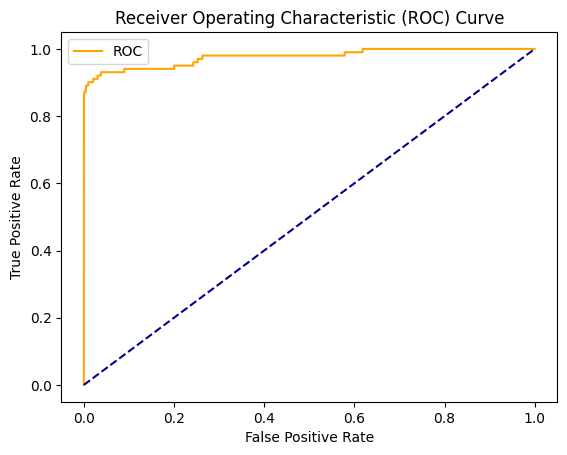

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=168, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=168
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=1.2780588498979437, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2780588498979437
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


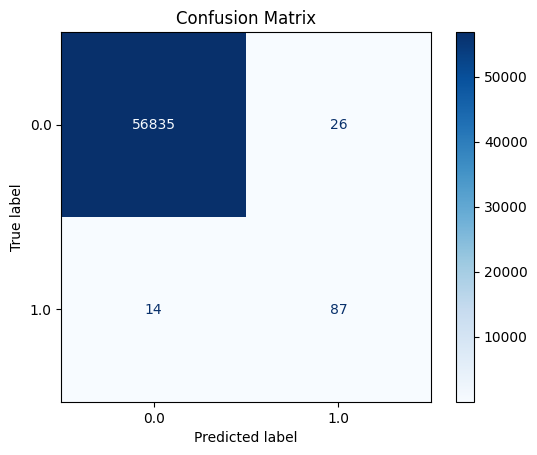

(LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, feature_fraction=0.2,
                lambda_l1=0, lambda_l2=0, learning_rate=0.22690320686746146,
                max_bin=61, max_depth=13, min_data_in_leaf=168,
                min_gain_to_split=1.2780588498979437, num_leaves=501),
 0.9992977774656788,
 np.float64(0.93046444160077),
 0.8130841121495327,
 np.float64(0.8127334482777326),
 8.776942729949951)

In [ ]:
study = optuna.create_study(direction="maximize")
func = lambda trial: objective(trial, x_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print("\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

param_lgb = {
    "max_depth": 13,
    "learning_rate": 0.22690320686746146,
    "num_leaves": 501,
    "min_data_in_leaf": 168,
    "max_bin": 61,
    "lambda_l1": 0,
    "lambda_l2": 0,
    "min_gain_to_split": 1.2780588498979437,
    "bagging_fraction": 0.9,
    "bagging_freq": 1,
    "feature_fraction": 0.2,
}

lgb_opt = lgb.LGBMClassifier(**param_lgb)
run_model(lgb_opt, x_train_smt, y_train_smt, x_test, y_test)

In [ ]:
import plotly.graph_objs as go
import plotly.subplots as tls
import plotly.io as pio

In [ ]:
pio.renderers.default = "colab"

model = lgb_opt
y_pred = model.predict(x_test)
y_score = model.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=168, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=168
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=1.2780588498979437, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2780588498979437
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] min_data_in_leaf is set=168, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=168
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_gain_to_split is set=1.2780588498979437, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2780588498979437
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [ ]:
# Conf matrix
conf_matrix = confusion_matrix(y_test, y_pred)
trace1 = go.Heatmap(
    z=conf_matrix,
    x=["0 (pred)", "1 (pred)"],
    y=["0 (true)", "1 (true)"],
    xgap=2,
    ygap=2,
    text=conf_matrix,
    colorscale="Viridis",
    showscale=False,
)

In [ ]:
# Show metrics
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
fp = conf_matrix[0, 1]
tn = conf_matrix[0, 0]
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)
F1_score = 2 * (
    ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn)))
)

show_metrics = pd.DataFrame(data=[[Accuracy, Precision, Recall, F1_score]])
show_metrics = show_metrics.transpose()

colors = ["gold", "lightgreen", "lightcoral", "lightskyblue"]
trace2 = go.Bar(
    x=show_metrics.to_numpy()[0],
    y=["Accuracy", "Precision", "Recall", "F1_score"],
    text=np.round(show_metrics.to_numpy()[0], 4),
    textposition="auto",
    orientation="h",
    opacity=0.8,
    marker=dict(color=colors, line=dict(color="#000000", width=1.5)),
)

In [ ]:
# Roc curve
model_roc_auc = round(roc_auc_score(y_test, y_score), 3)
fpr, tpr, t = roc_curve(y_test, y_score)
trace3 = go.Scatter(
    x=fpr,
    y=tpr,
    name="Roc : " + str(model_roc_auc),
    line=dict(color="rgb(22, 96, 167)", width=2),
    fill="tozeroy",
)
trace4 = go.Scatter(
    x=[0, 1], y=[0, 1], line=dict(color="black", width=1.5, dash="dot")
)

In [ ]:
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
trace5 = go.Scatter(
    x=recall,
    y=precision,
    name="Precision" + str(precision),
    line=dict(color="lightcoral", width=2),
    fill="tozeroy",
)

In [ ]:
# Feature importance
coef_sumry = pd.DataFrame(
    {
        "features": model.feature_name_,  # LightGBM stores feature names here
        "coefficients": model.feature_importances_,  # Importance scores (not actual coefficients)
    }
)
coef_sumry.columns = ["features", "coefficients"]
coef_sumry = coef_sumry.filter(pd.col("coefficients") != 0).sort(
    by="coefficients", descending=True
)
x = DataFrame()
column_names = []
coefficients = []
for el in coef_sumry.rows():
    index = int(el[0].split("Column_")[1])
    column_names.append(
        df.select(pd.nth(index)).select(pd.first()).get_columns()[0].name
    )
    coefficients.append(el[1])
x.insert_column(0, pd.Series("features", column_names))
x.insert_column(1, pd.Series("coefficients", coefficients))
coef_sumry = x
trace6 = go.Bar(
    x=coef_sumry["features"],
    y=coef_sumry["coefficients"],
    name="features",
    marker=dict(
        color="Violet",
        colorscale="Viridis",
        line=dict(width=0.6, color="black"),
    ),
)

In [ ]:
# Cumulative gain

pos = (
    DataFrame(y_test).to_dummies().to_numpy()
)  # pandas.get_dummies(y_test).to_numpy()
pos = pos[:, 1]
npos = np.sum(pos)
index = np.argsort(y_score)
index = index[::-1]
sort_pos = pos[index]
# cumulative sum
cpos = np.cumsum(sort_pos)
# recall
recall = cpos / npos
# size obs test
n = y_test.shape[0]
size = np.arange(start=1, stop=369, step=1)
# proportion
size = size / n
# plots
trace7 = go.Scatter(
    x=size,
    y=recall,
    name="Lift curve",
    line=dict(color="gold", width=2),
    fill="tozeroy",
)

In [ ]:
# Subplots
fig = tls.make_subplots(
    rows=4,
    cols=2,
    print_grid=False,
    specs=[[{}, {}], [{}, {}], [{"colspan": 2}, None], [{"colspan": 2}, None]],
    subplot_titles=(
        "Confusion Matrix",
        "Metrics",
        "ROC curve" + " " + "(" + str(model_roc_auc) + ")",
        "Precision - Recall curve",
        "Cumulative gains curve",
        "Feature importance",
    ),
)

fig.add_trace(trace1, 1, 1)
fig.add_trace(trace2, 1, 2)
fig.add_trace(trace3, 2, 1)
fig.add_trace(trace4, 2, 1)
fig.add_trace(trace5, 2, 2)
fig.add_trace(trace6, 4, 1)
fig.add_trace(trace7, 3, 1)

fig["layout"].update(
    showlegend=False,
    title="Model performance report" + "LightGBM after tuning",
    autosize=False,
    height=1500,
    width=830,
    plot_bgcolor="rgba(240,240,240, 0.95)",
    paper_bgcolor="rgba(240,240,240, 0.95)",
    margin=dict(b=195),
)
fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
fig["layout"]["xaxis3"].update(dict(title="false positive rate"))
fig["layout"]["yaxis3"].update(dict(title="true positive rate"))
fig["layout"]["xaxis4"].update(dict(title="recall"), range=[0, 1.05])
fig["layout"]["yaxis4"].update(dict(title="precision"), range=[0, 1.05])
fig["layout"]["xaxis5"].update(dict(title="Percentage contacted"))
fig["layout"]["yaxis5"].update(dict(title="Percentage positive targeted"))
fig.layout.title.font.size = 14

fig.show("colab")